# EDA Floods o Inundaciones


Usando dataset ../../Data/03Limpio/03desastreslimpio.csv

## Objetivo

### Identificar condiciones y patrones relacionadas a inundaciones

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 40)
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Cargar datos

In [3]:
df = pd.read_csv('../../Data/03Limpio/03desastreslimpio.csv')

# Verificar carga de dataset

##  Resumen básico shape, info, head

In [4]:
df.shape
# Resultado: 16636 filas y 20 columnas)

(16636, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             16636 non-null  object
 1   Year               16636 non-null  int64 
 2   Seq                16636 non-null  int64 
 3   Disaster Subgroup  16636 non-null  object
 4   Disaster Type      16636 non-null  object
 5   Disaster Subtype   13313 non-null  object
 6   Country            16636 non-null  object
 7   ISO                16636 non-null  object
 8   Region             16636 non-null  object
 9   Continent          16636 non-null  object
 10  Location           14825 non-null  object
 11  Origin             4085 non-null   object
 12  Associated Dis     3593 non-null   object
 13  Dis Mag Value      16636 non-null  int64 
 14  Dis Mag Scale      15416 non-null  object
 15  Latitude           2775 non-null   object
 16  Longitude          2775 non-null   objec

In [6]:
df.head(20)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,4,8,1902,4,8,1000,0,0
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,10,24,1902,10,24,6000,0,0
5,1903-0006-CAN,1903,6,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1903,4,29,1903,4,29,76,23,0
6,1903-0012-COM,1903,12,Geophysical,Volcanic activity,Ash fall,Comoros (the),COM,Eastern Africa,Africa,...,NaN,1903,0,0,1903,0,0,17,0,0
7,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
8,1905-0005-CAN,1905,5,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1905,8,13,1905,8,13,18,18,0
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


## Columns

In [7]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

# Flood filter

### Filtro principal para Flood
Selecciona solo las filas en el DataFrame donde la columna 'Disaster Type' es 'Flood'.

In [8]:
# Filtro principal para Flood
flood_filter = df['Disaster Type'] == 'Flood'
df_flood = df[flood_filter]

In [9]:
df_flood.head(10)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
12,1906-0023-BEL,1906,23,Hydrological,Flood,NaN,Belgium,BEL,Western Europe,Europe,...,NaN,1906,5,14,1906,5,14,6,0,0
13,1906-0024-BEL,1906,24,Hydrological,Flood,NaN,Belgium,BEL,Western Europe,Europe,...,NaN,1906,4,0,1906,4,0,0,0,0
34,1911-0002-CHN,1911,2,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,...,NaN,1911,0,0,1911,0,0,100000,0,0
39,1915-0011-CHN,1915,11,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,...,NaN,1915,0,0,1915,0,0,0,3000000,0
43,1917-0013-CHN,1917,13,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,...,NaN,1917,0,0,1917,0,0,0,635000,0
57,1920-0005-DFR,1920,5,Hydrological,Flood,NaN,Germany Fed Rep,DFR,Western Europe,Europe,...,NaN,1920,8,0,1920,8,0,0,0,291520
75,1925-0007-DFR,1925,7,Hydrological,Flood,NaN,Germany Fed Rep,DFR,Western Europe,Europe,...,NaN,1925,12,0,1925,12,0,0,0,316357
81,1926-0006-DFR,1926,6,Hydrological,Flood,NaN,Germany Fed Rep,DFR,Western Europe,Europe,...,NaN,1926,6,0,1926,6,0,0,0,511311
84,1926-0008-IND,1926,8,Hydrological,Flood,Riverine flood,India,IND,Southern Asia,Asia,...,NaN,1926,7,19,1926,7,19,0,0,0
89,1927-0012-DZA,1927,12,Hydrological,Flood,NaN,Algeria,DZA,Northern Africa,Africa,...,NaN,1927,11,1,1927,11,1,3000,0,0


## Análisis básico para df_flood

In [10]:
df_flood.shape

(5808, 26)

In [11]:
df_flood.isnull().sum()

Dis No                  0
Year                    0
Seq                     0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype     2244
Country                 0
ISO                     0
Region                  0
Continent               0
Location              296
Origin               2362
Associated Dis       4425
Dis Mag Value           0
Dis Mag Scale           0
Latitude             4810
Longitude            4810
Start Year              0
Start Month             0
Start Day               0
End Year                0
End Month               0
End Day                 0
Total Deaths            0
Total Affected          0
Total Damages Adj       0
dtype: int64

In [12]:
df_flood.isna().sum()

Dis No                  0
Year                    0
Seq                     0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype     2244
Country                 0
ISO                     0
Region                  0
Continent               0
Location              296
Origin               2362
Associated Dis       4425
Dis Mag Value           0
Dis Mag Scale           0
Latitude             4810
Longitude            4810
Start Year              0
Start Month             0
Start Day               0
End Year                0
End Month               0
End Day                 0
Total Deaths            0
Total Affected          0
Total Damages Adj       0
dtype: int64

In [13]:
df_flood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5808 entries, 12 to 16634
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             5808 non-null   object
 1   Year               5808 non-null   int64 
 2   Seq                5808 non-null   int64 
 3   Disaster Subgroup  5808 non-null   object
 4   Disaster Type      5808 non-null   object
 5   Disaster Subtype   3564 non-null   object
 6   Country            5808 non-null   object
 7   ISO                5808 non-null   object
 8   Region             5808 non-null   object
 9   Continent          5808 non-null   object
 10  Location           5512 non-null   object
 11  Origin             3446 non-null   object
 12  Associated Dis     1383 non-null   object
 13  Dis Mag Value      5808 non-null   int64 
 14  Dis Mag Scale      5808 non-null   object
 15  Latitude           998 non-null    object
 16  Longitude          998 non-null    objec

## Borrar filas con valores faltantes

In [15]:
print("Unique values in DataFrame before cleaning:")
print(df_flood.nunique())

Unique values in DataFrame before cleaning:
Dis No               5808
Year                   99
Seq                   820
Disaster Subgroup       1
Disaster Type           1
Disaster Subtype        3
Country               190
ISO                   190
Region                 23
Continent               5
Location             5230
Origin                430
Associated Dis         21
Dis Mag Value        1563
Dis Mag Scale           1
Latitude              924
Longitude             908
Start Year             99
Start Month            13
Start Day              32
End Year               99
End Month              13
End Day                32
Total Deaths          406
Total Affected       2304
Total Damages Adj    1645
dtype: int64


In [16]:
print("Shape de df_flood antes de limpiar:", df_flood.shape)
print("Info de df_flood antes de limpiar:")
print(df_flood.info())
print("Value counts de df_flood antes de limpiar:")
print(df_flood.value_counts())
print("Null value counts de df_flood antes de limpiar:")
print(df_flood.isnull().sum())

df_flood_cleaned = df_flood.copy()
df_flood_cleaned.dropna(inplace=True)

# Resetear index si df_flood no está vacío
if not df_flood_cleaned.empty:
    df_flood_cleaned.reset_index(drop=True, inplace=True)
else:
    print("Shape antes de rellenar valores faltantes:", df_flood_cleaned.shape)
    print("Info antes de rellenar valores faltantes:")
    print(df_flood_cleaned.info())
    
    # Rellenar valores faltantes que queden con 0
    numeric_columns = df_flood_cleaned.select_dtypes(include=['number']).columns
    df_flood_cleaned.loc[:, numeric_columns] = df_flood_cleaned.loc[:, numeric_columns].fillna(0)

print("Shape de df_flood_cleaned después de limpiar:", df_flood_cleaned.shape)
print("Info de df_flood_cleaned después de limpiar:")
print(df_flood_cleaned.info())
print("Value counts de df_flood_cleaned después de limpiar:")
print(df_flood_cleaned.value_counts())
print("Null value counts de df_flood_cleaned después de limpiar:")
print(df_flood_cleaned.isnull().sum())

Shape de df_flood antes de limpiar: (5808, 26)
Info de df_flood antes de limpiar:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5808 entries, 12 to 16634
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             5808 non-null   object
 1   Year               5808 non-null   int64 
 2   Seq                5808 non-null   int64 
 3   Disaster Subgroup  5808 non-null   object
 4   Disaster Type      5808 non-null   object
 5   Disaster Subtype   3564 non-null   object
 6   Country            5808 non-null   object
 7   ISO                5808 non-null   object
 8   Region             5808 non-null   object
 9   Continent          5808 non-null   object
 10  Location           5512 non-null   object
 11  Origin             3446 non-null   object
 12  Associated Dis     1383 non-null   object
 13  Dis Mag Value      5808 non-null   int64 
 14  Dis Mag Scale      5808 non-null   object
 15  Latit

### Categorías de condiciones asociadas al filtro Flood: geográficas, magnitud, geolocalización, temporales, etc.

In [17]:
# Categorías geográficas de Flood
df_flood_geographical = df_flood_cleaned[['Location', 'ISO', 'Country', 'Region', 'Continent']]

# Categorías de magnitud de Flood
df_flood_magnitude = df_flood_cleaned[['Dis Mag Scale', 'Dis Mag Value']]

# Categorías de geolocalización de Flood
df_flood_geoloc = df_flood_cleaned[['Latitude', 'Longitude']]

# Categorías de fecha de Flood
df_flood_temp = df_flood_cleaned[['Start Month', 'Start Year', 'End Year', 'End Year']]

## Análisis geográfico de inundaciones

In [18]:
df_flood_geographical.shape # (5808, 5)
df_flood_geographical.info

<bound method DataFrame.info of                                               Location  ISO      Country  \
0     Limbe area (Fako district, Sud - Ouest province)  CMR     Cameroon   
1    Badghis, Uruzgan, Hilmand, Hirat, Ghor, Nimroz...  AFG  Afghanistan   
2    Si Xian, Xiao Xian areas (Suzhou district, Anh...  CHN        China   
3                             Bio Bio, Maule provinces  CHL        Chile   
4    Thessalonikis, Chalkidikis districts (Kentriki...  GRC       Greece   
..                                                 ...  ...          ...   
262  Farkhor, Vose, Temurmalik, Khuroson, Panj (Kha...  TJK   Tajikistan   
263  Maranon Province , Huanuco Department (central...  PER         Peru   
264  Cairo, Giza, Monufia, Sharkeia, South Sinai, R...  EGY        Egypt   
265                                    Kasese District  UGA       Uganda   
266          Montevideo, Lavalleja, Colonia, Canelones  URY      Uruguay   

              Region Continent  
0      Middle Africa  

### Distribución geográfica de inundaciones

#### Value counts: Contar ocurrencias de inundaciones en diferentes localizaciones, países, regiones y continentes

#### Continent

In [19]:
continent_counts = df_flood_geographical['Continent'].value_counts()
continent_counts

Asia        124
Americas     73
Africa       33
Europe       28
Oceania       9
Name: Continent, dtype: int64

#### Region

In [20]:
region_counts = df_flood_geographical['Region'].value_counts()
region_counts

Southern Asia                42
South-Eastern Asia           41
South America                39
Eastern Asia                 27
Eastern Africa               18
Southern Europe              15
Central America              14
Northern America             12
Western Asia                  8
Caribbean                     8
Central Asia                  6
Eastern Europe                6
Melanesia                     6
Northern Africa               5
Western Europe                4
Western Africa                4
Middle Africa                 4
Australia and New Zealand     3
Northern Europe               3
Southern Africa               2
Name: Region, dtype: int64

#### Country

In [21]:
country_counts = df_flood_geographical['Country'].value_counts()
country_counts

China                19
India                17
Brazil               15
Indonesia            15
Philippines (the)    12
                     ..
Kyrgyzstan            1
Somalia               1
Montenegro            1
Zimbabwe              1
Uruguay               1
Name: Country, Length: 89, dtype: int64

#### Location

In [22]:
location_counts = df_flood_geographical['Location'].value_counts()
location_counts

Limbe area (Fako district, Sud - Ouest province)                                                                                                                                                                                                                                                                                                                                                   1
Kanchanpur, Baitadi, Dadeldhura areas (Mahakali district, Far Western province), Kailali, Doti, Achham, Bajhang areas (Seti district, Far Western province), Bardiya, Banke areas (Bheri district, Mid Western province), Dang area (Rapti district, Mid Western province), Myagdi area (Dhawalagiri district, Western province), Jumla, Kalikot areas (Karnali district, Mid Western province)    1
Draguignan, Les Arcs, Figanieres, Roquebrune sur Argens, Luo, Muy, Trans cities (Var distric, Provence-Alpes-Cote-d'Azur province)                                                                                            

## Visualizar la distribución geográfica de inundaciones a partir de value_counts usando bar charts o countplot

In [23]:
# Establecer tamaño de fuente a 10
plt.rcParams.update({'font.size': 10})

### Distribución de inundaciones por continente

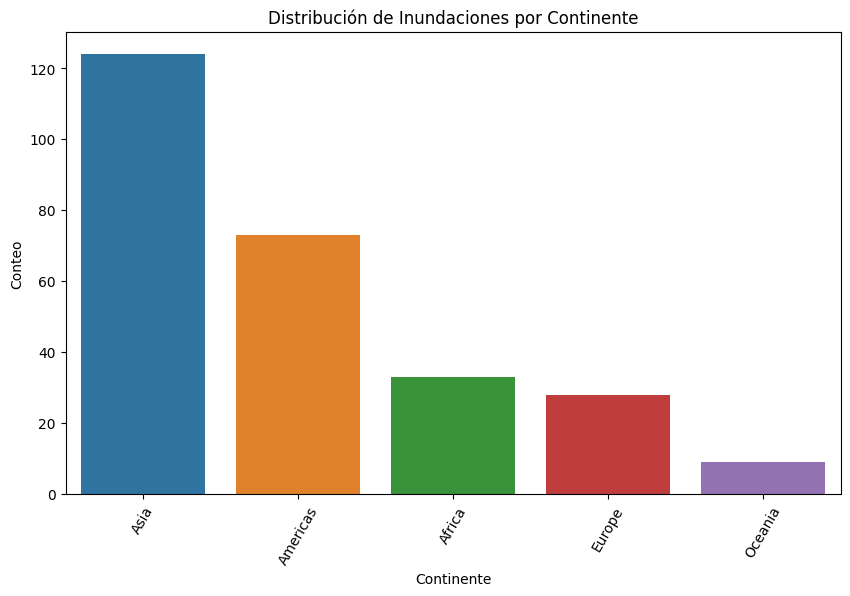

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.title('Distribución de Inundaciones por Continente')
plt.xlabel('Continente')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
plt.show()

Insights sobre inundaciones en continentes:

Asia es el continente donde más inundaciones ha habido. Oceanía está muy por debajo del resto con 157.
1. Asia        2407
2. Americas    1353
3. Africa      1213
4. Europe       678
5. Oceania      157

### Region

#### Distribución de inundaciones por región

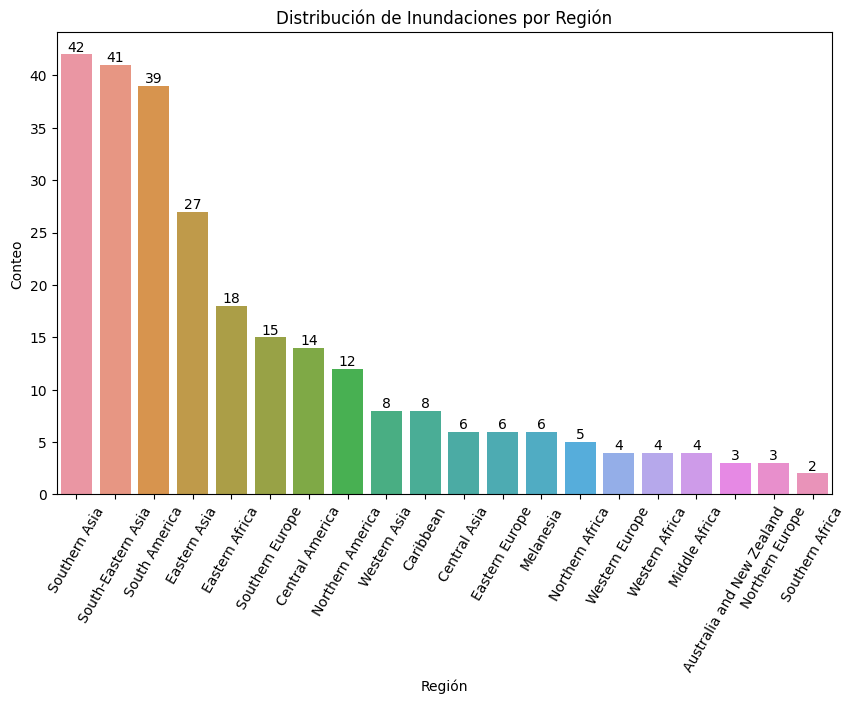

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
ax = sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Distribución de Inundaciones por Región')
plt.xlabel('Región')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
ax.bar_label(ax.containers[0]); 
plt.show()

Insights sobre inundaciones en regiones: Si bien es cierto que algunas regiones de Asia están en el top 5 de inundaciones, estas se encuentran distribuidas entre diferentes regiones. Sudamérica ocupa el tercer puesto.
Polynesia, Micronesia y la Federación Rusa son las que menos inundaciones sufren.

### Country

#### Distribución de inundaciones por país

In [26]:
# Establecer tamaño de fuente a 4
plt.rcParams.update({'font.size': 4})

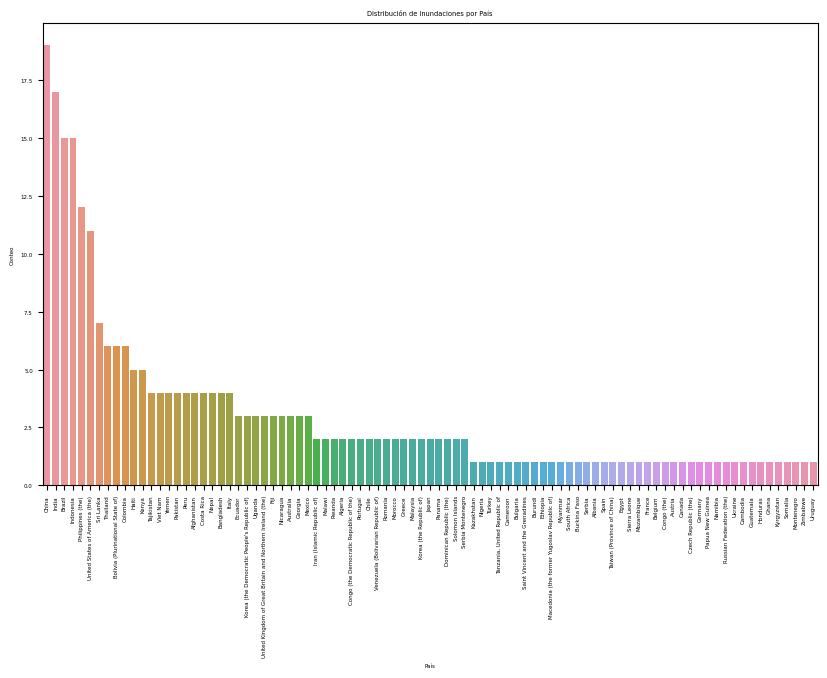

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribución de Inundaciones por País')
plt.xlabel('País')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

In [28]:
# Establecer tamaño de fuente a 10
plt.rcParams.update({'font.size': 10})

In [29]:
# Sintetizar la información anterior en top 20 para mejorar visualización
top30_floods_countries = df_flood_geographical['Country'].value_counts().head(30)
top30_floods_countries

China                                                         19
India                                                         17
Brazil                                                        15
Indonesia                                                     15
Philippines (the)                                             12
United States of America (the)                                11
Sri Lanka                                                      7
Thailand                                                       6
Bolivia (Plurinational State of)                               6
Colombia                                                       6
Haiti                                                          5
Kenya                                                          5
Tajikistan                                                     4
Viet Nam                                                       4
Yemen                                                          4
Pakistan                 

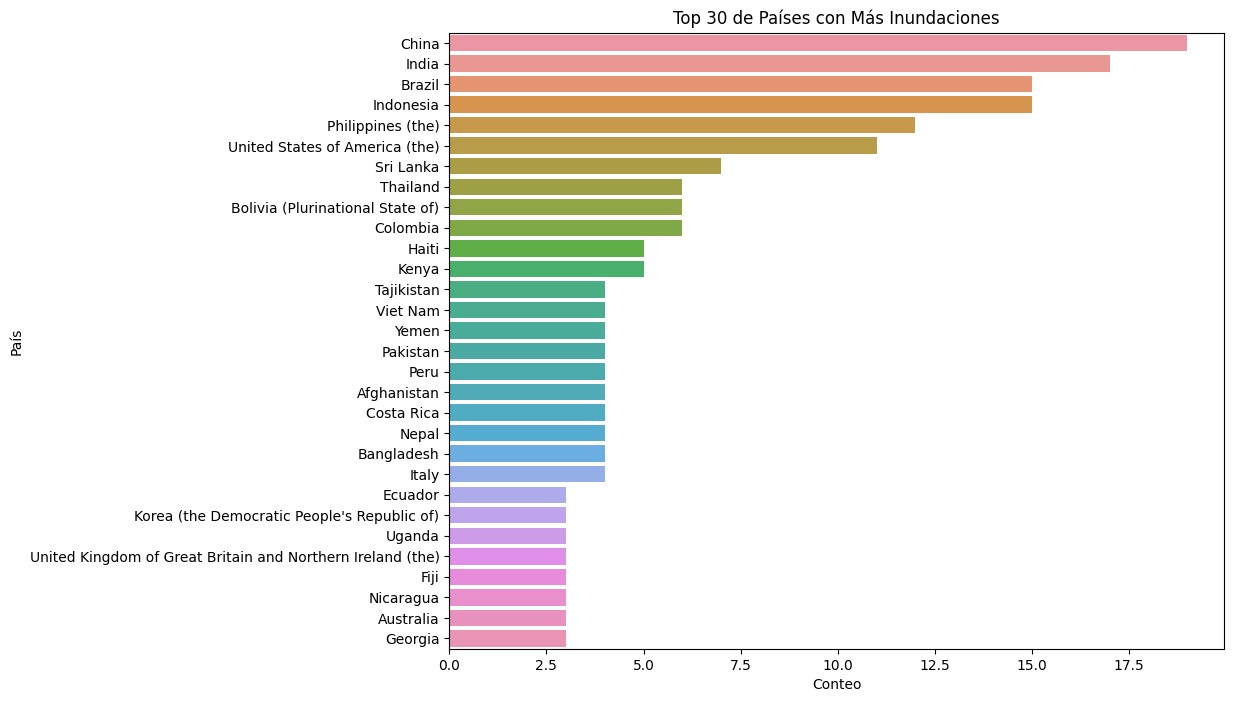

In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top30_floods_countries.values, y=top30_floods_countries.index)
plt.title('Top 30 de Países con Más Inundaciones')
plt.xlabel('Conteo')
plt.ylabel('País')
plt.show()

In [31]:
top10_floods_countries = df_flood_geographical['Country'].value_counts().head(10)
top10_floods_countries

China                               19
India                               17
Brazil                              15
Indonesia                           15
Philippines (the)                   12
United States of America (the)      11
Sri Lanka                            7
Thailand                             6
Bolivia (Plurinational State of)     6
Colombia                             6
Name: Country, dtype: int64

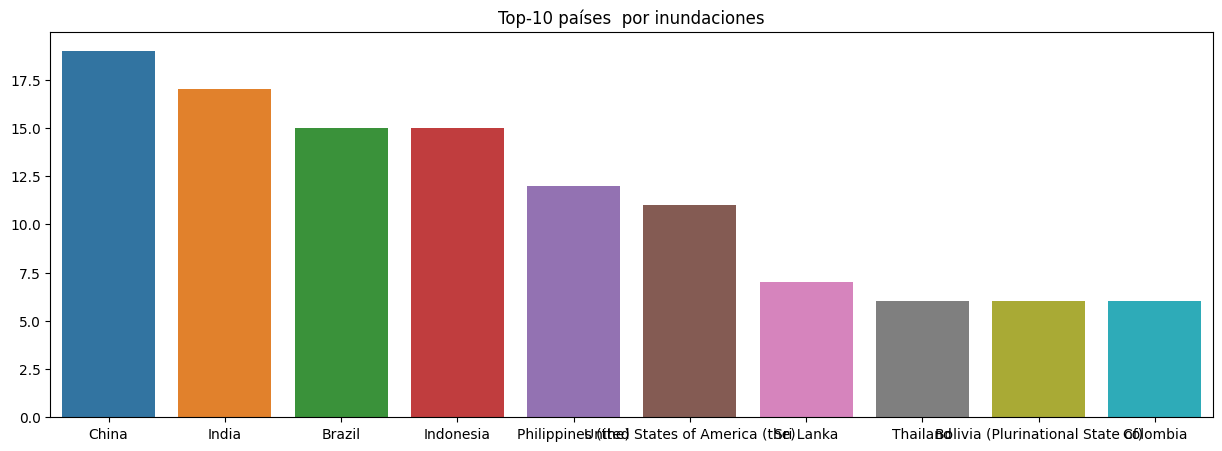

In [32]:
plt.figure(figsize=(15,5))
ax =sns.barplot(y=top10_floods_countries.values, x=top10_floods_countries.index)
plt.title('Top-10 países  por inundaciones')

plt.show()

### Location

#### Distribución de inundaciones por localidad

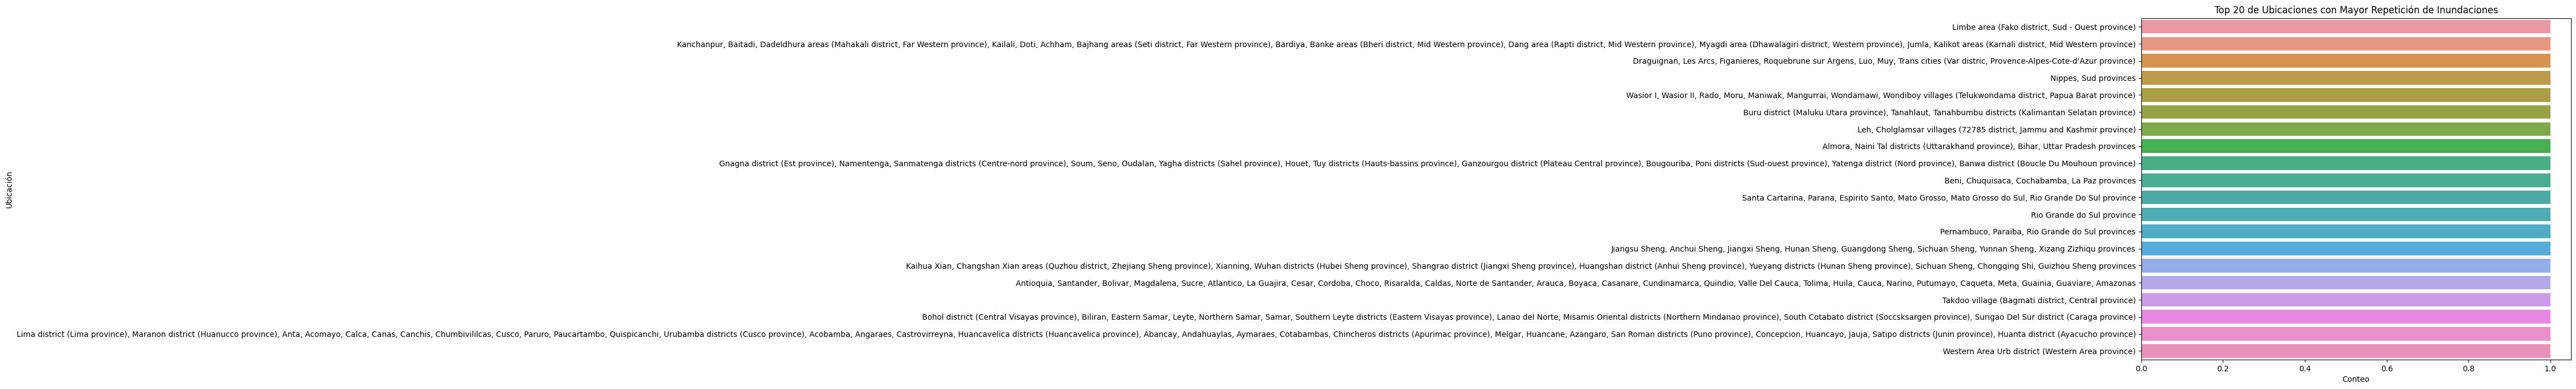

In [33]:
plt.figure(figsize=(10, 8))
sns.countplot(y=df_flood_geographical['Location'], order=df_flood_geographical['Location'].value_counts().head(20).index)
plt.title('Top 20 de Ubicaciones con Mayor Repetición de Inundaciones')
plt.xlabel('Conteo')
plt.ylabel('Ubicación')
plt.show()

y=flood_geographical_data['Location']: Especifica la variable que se trazará en el eje y. En este caso, queremos mostrar las ubicaciones de los inundaciones.

order=flood_geographical_data['Location'].value_counts().head(20).index: este parámetro especifica el orden en el que deben aparecer las categorías en el eje y. Usamos el método value_counts() para obtener el recuento de ocurrencias para cada ubicación, luego usamos head(20) para seleccionar las 20 ubicaciones principales y, finalmente, .index se usa para extraer el índice (ubicaciones) de la serie resultante. Esto asegura que las ubicaciones con el conteo más alto se mostrarán en la parte superior de la gráfica.

### Repetición de inundaciones por localidades

In [34]:
location_counts = df_flood_geographical['Location'].value_counts()
repeated_fld_locations = location_counts[location_counts > 1]
repeated_fld_locations
top20_repeated_fld_locations = repeated_fld_locations.head(20)
top20_repeated_fld_locations

Series([], Name: Location, dtype: int64)

In [35]:
# plt.figure(figsize=(10, 8))
# ax = sns.barplot(x=top20_repeated_fld_locations.values, y=top20_repeated_fld_locations.index, palette='viridis')
# ax.set_xlim(0, max(top20_repeated_fld_locations.values) + 1)
# for i, count in enumerate(top20_repeated_fld_locations.values):
#     ax.text(count + 0.1, i, int(count), ha='left', va='center')
# plt.title('Top 20 Ubicaciones con Mayor Repetición de Inundaciones')
# plt.xlabel('Cantidad de veces que ha habido inundaciones')
# plt.ylabel('Ubicación')
# plt.show()

Insights sobre repetición de inundaciones en localidades:
1. La localidad donde más inundaciones se han repetido es South, en 16 ocasiones.
2. Le sigue North con 15.
3. Utar Pradesh es la tercera con 7.

### Desastres asociados de las inundaciones

In [36]:
print(df_flood['Associated Dis'].value_counts())
print(df_flood_cleaned['Associated Dis'].value_counts())

Slide (land, mud, snow, rock)    1005
Broken Dam/Burst bank             139
Rain                               84
Storm                              65
Lightening                         37
Hail                                9
Transport accident                  9
Collapse                            7
Flood                               6
Snow/ice                            3
Tsunami/Tidal wave                  3
Cold wave                           3
Surge                               2
Famine                              2
Fire                                2
Industrial accidents                2
Explosion                           1
Epidemic                            1
Pollution                           1
Crop failure                        1
Wildfire                            1
Name: Associated Dis, dtype: int64
Slide (land, mud, snow, rock)    205
Broken Dam/Burst bank             33
Rain                              18
Lightening                         2
Transport accident 

In [37]:
df_flood_cleaned['Associated Dis'].isnull().sum()

0

In [38]:
len(df_flood_cleaned['Associated Dis'])

267

De los 21 tipos de  desastres asociados que conllevan los inundaciones, el conteo más alto de los 5808 casos corresponde a:
1005 deslizamientos y 139 presas rotas y reventamiento de bancos acuáticos, seguidos por 84 eventos de lluvias torrenciales y 65 tormentas. De lejos le siguen las inundaciones relámpago con 37 casos.

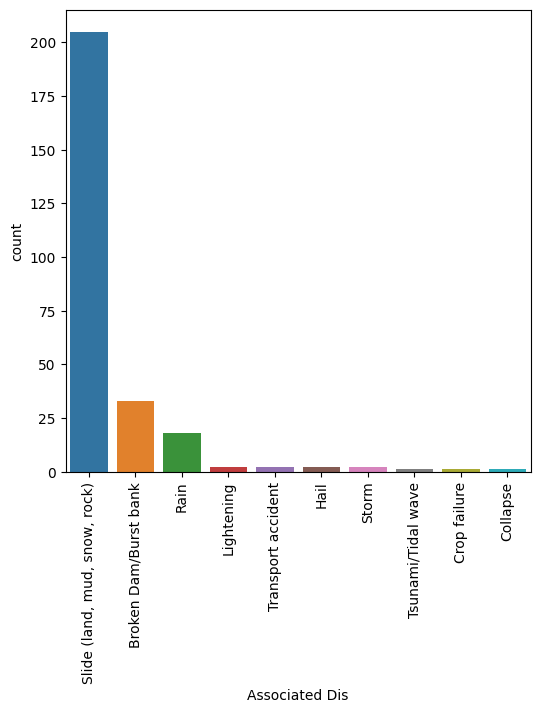

In [39]:
plt.figure(figsize=(6,6))
order = df_flood_cleaned['Associated Dis'].value_counts(ascending=False).index
sns.countplot(data=df_flood_cleaned, x='Associated Dis', order=order)
plt.xticks(rotation=90);

### Distribución anual y por continente de la frecuencia de inundaciones

In [40]:
df_flood_cleaned.groupby('Continent')['Start Year'].value_counts()

Continent  Start Year
Africa     2007          10
           2009           4
           2010           4
           2006           3
           2008           3
                         ..
Oceania    2007           1
           2008           1
           2010           1
           2012           1
           2014           1
Name: Start Year, Length: 58, dtype: int64

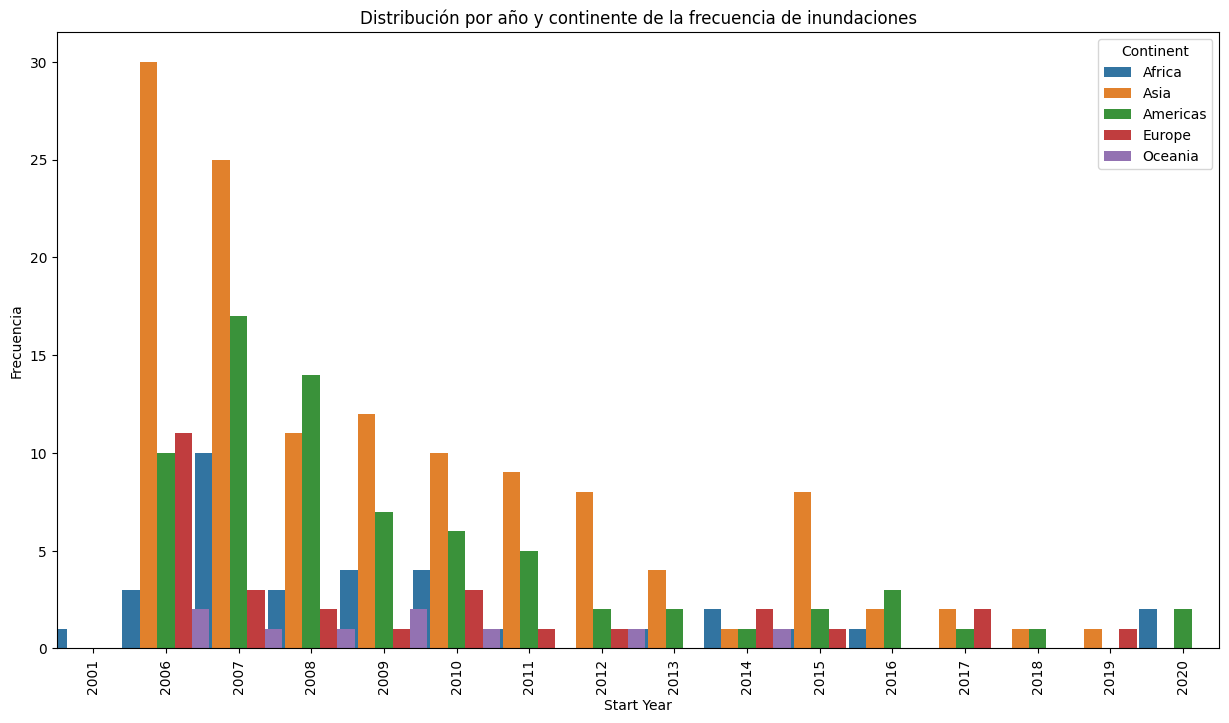

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_flood_cleaned, x='Start Year', hue='Continent', width=1.2)
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Distribución por año y continente de la frecuencia de inundaciones');

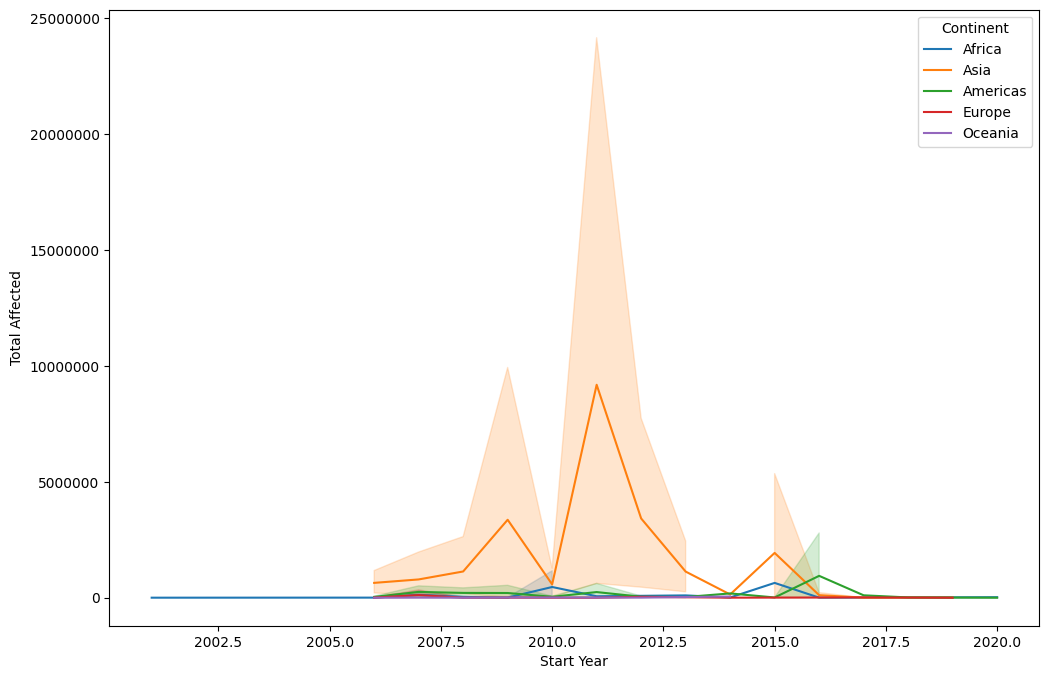

In [42]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_flood_cleaned, x='Start Year', y='Total Affected', hue='Continent')
plt.ticklabel_format(style='plain', axis='y')

## Correlaciones

In [43]:
df_flood_cleaned.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

### Segmentación de correlaciones: por tipo, geográfica y temporal

In [44]:
df_flood_corr_type = df_flood_cleaned[['Disaster Subtype', 'Associated Dis']]
df_flood_corr_geo = df_flood_cleaned[['Continent', 'Region', 'Country', 'Origin']]
df_flood_corr_temp = df_flood_cleaned[['Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']]
df_flood_corr_magn = df_flood_cleaned[['Dis Mag Value', 'Dis Mag Scale']]
df_flood_corr_geoloc = df_flood_cleaned[['Latitude', 'Longitude']]

C:\Users\AleEng\AppData\Local\Temp\ipykernel_10608\595568607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_flood_cleaned.corr(), annot=True, cmap='Blues', cbar=False)


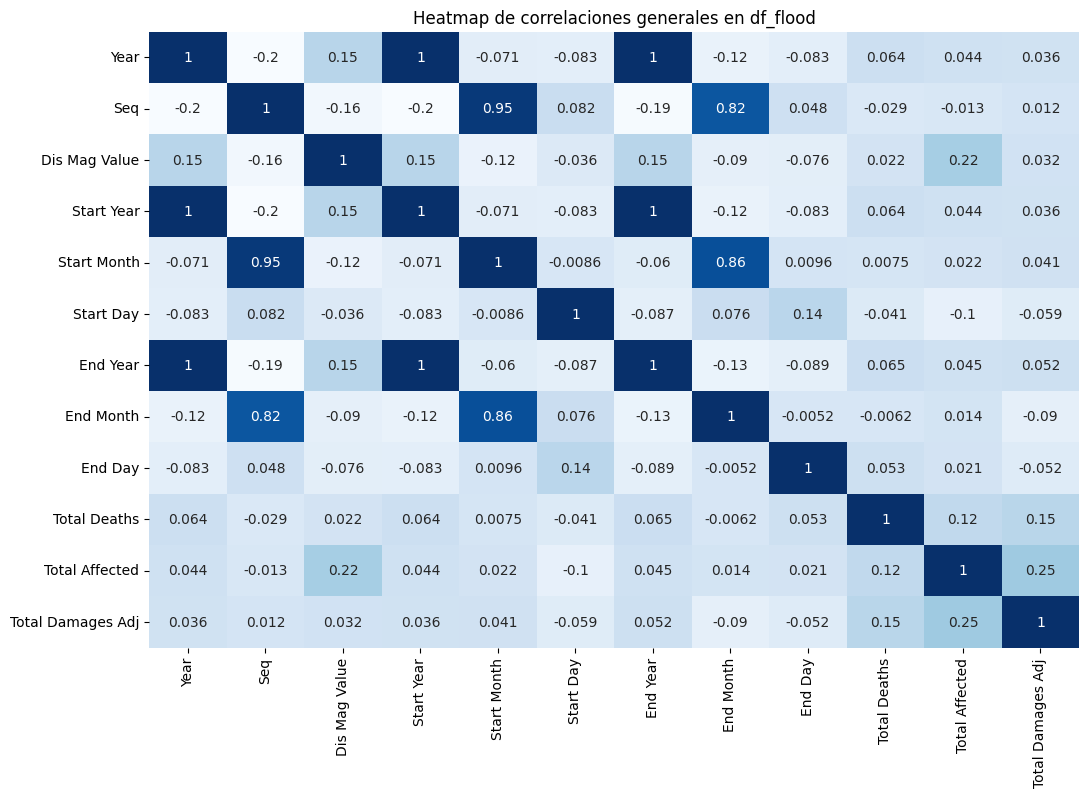

In [45]:
# Heatmap general de df_flood
plt.figure(figsize=(12, 8))
sns.heatmap(df_flood_cleaned.corr(), annot=True, cmap='Blues', cbar=False)
plt.title('Heatmap de correlaciones generales en df_flood')
plt.show()

### Correlaciones por subtipo de desastre y desastre asociado

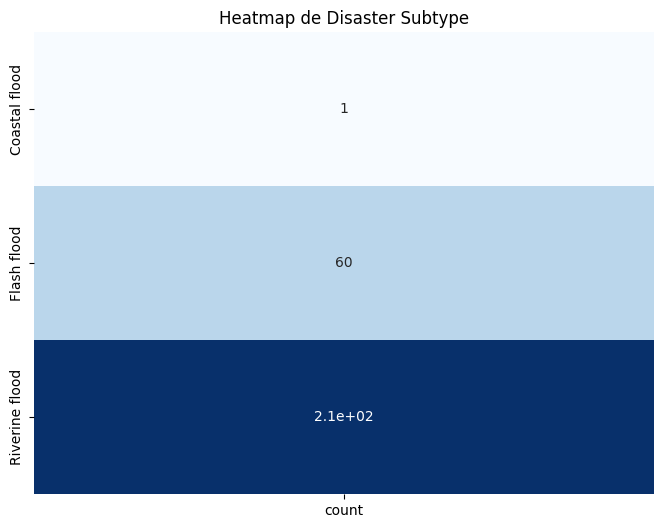

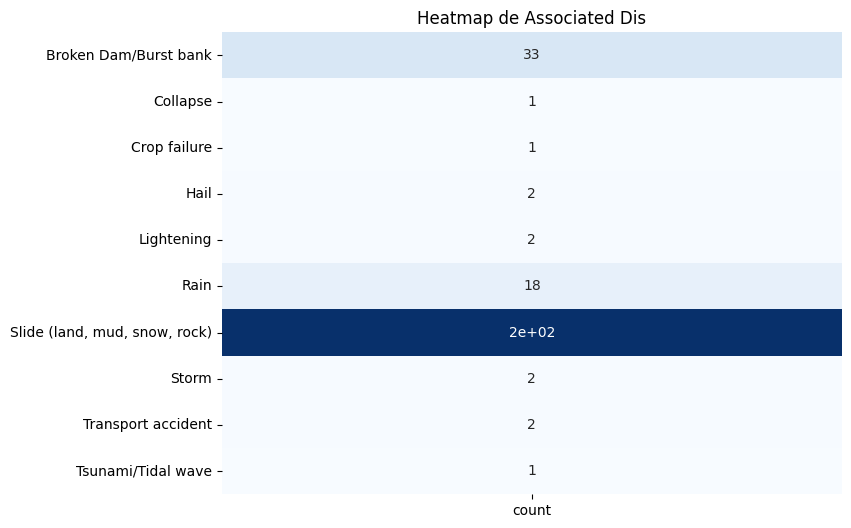

In [46]:
for column in df_flood_corr_type:
    crosstab = pd.crosstab(df_flood_corr_type[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Las correlaciones más altas en relación a tipología son:

+ Subtipo de desastre:
    * Inundación fluvial
    * Inundación repentina
    * Inundación costera

+ Desastre asociado:
    * Deslizamientos o Slide (land, mud, snow, rock)
    * Presa rota, banco reventado
    * Lluvia
    * Tormenta
    * Inundación relámpago

### Correlaciones geográficas

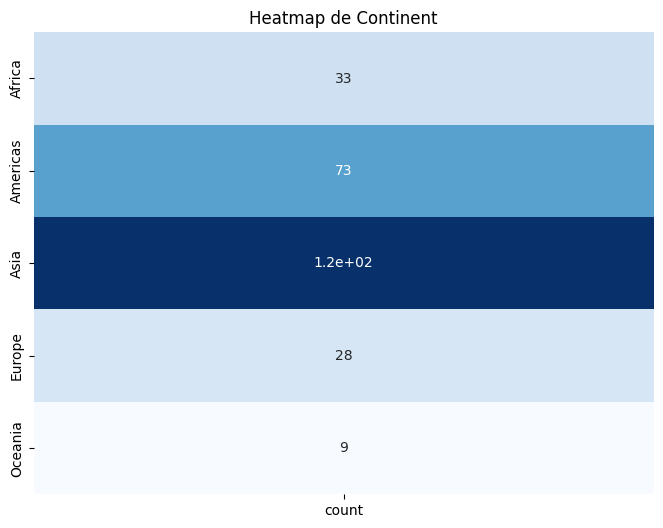

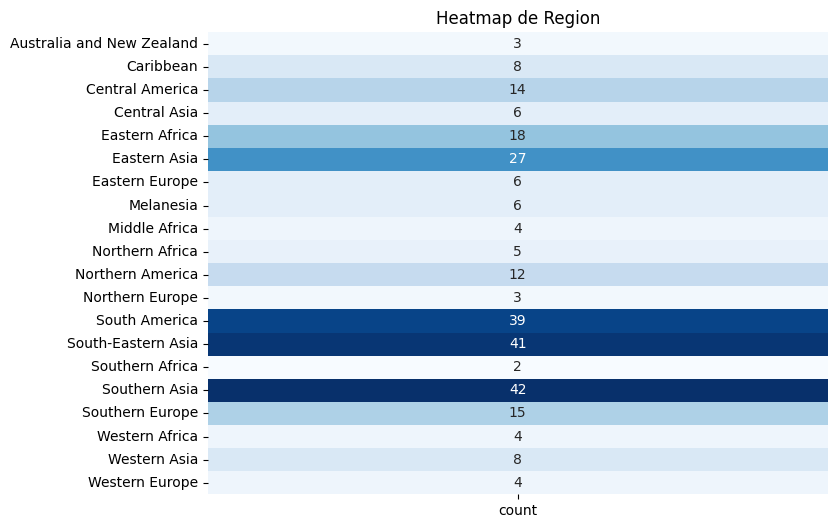

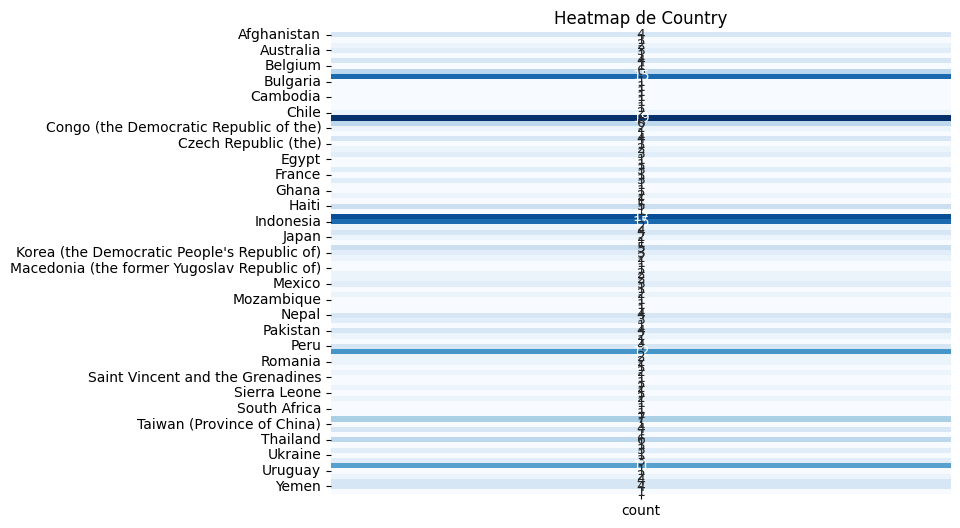

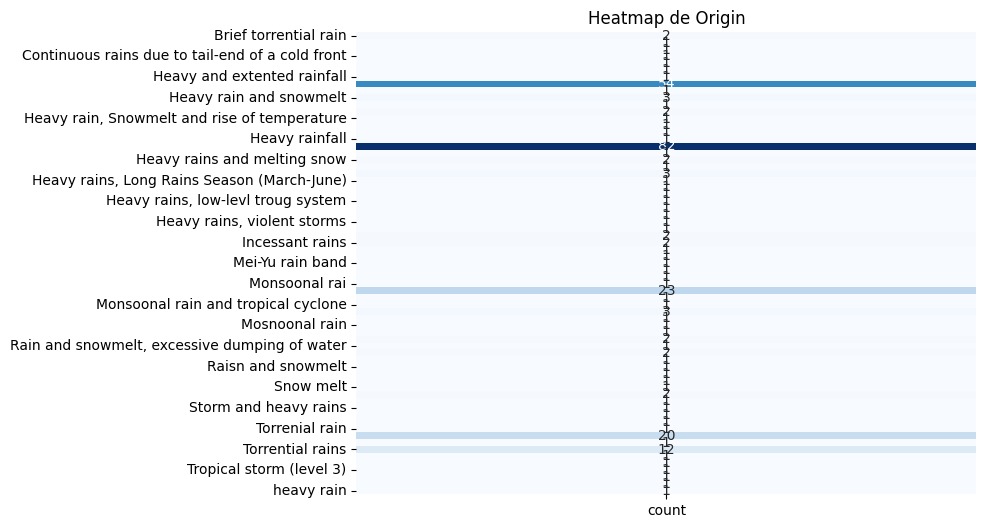

In [47]:
for column in df_flood_corr_geo:
    crosstab = pd.crosstab(df_flood_corr_geo[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Correlaciones temporales

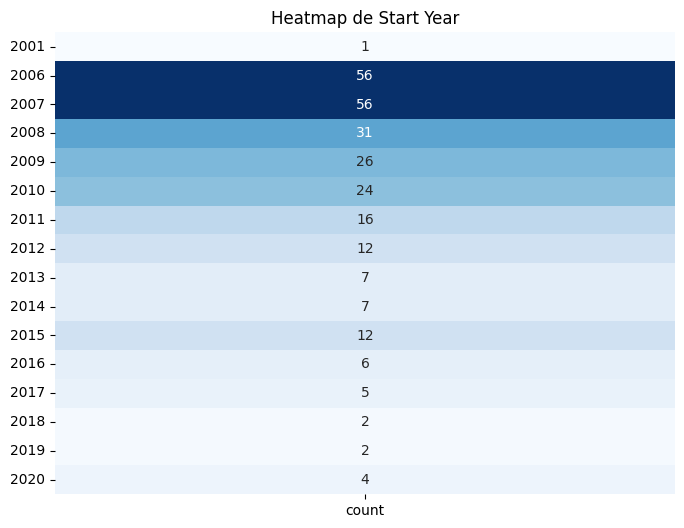

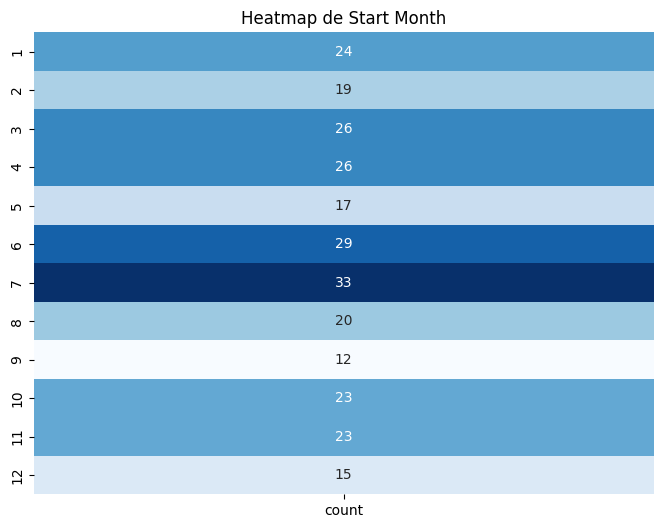

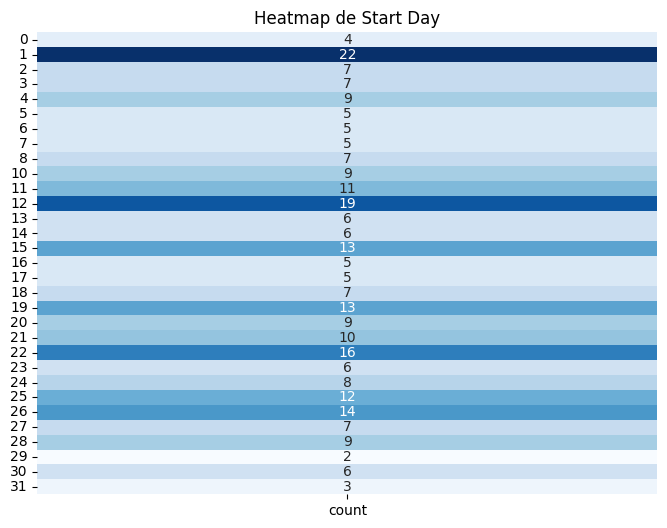

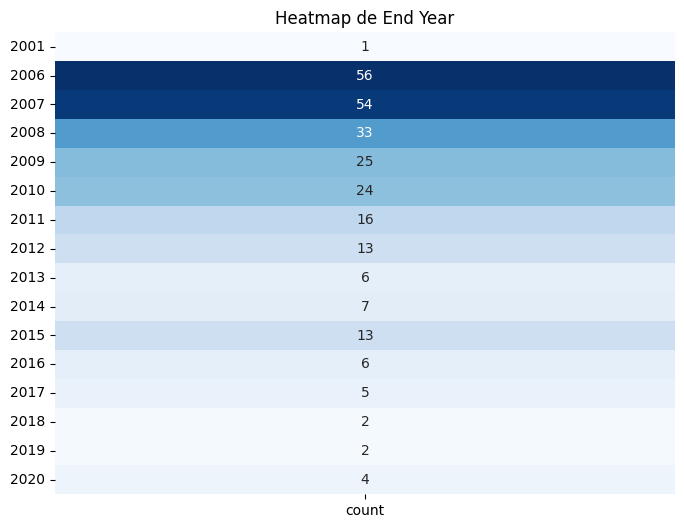

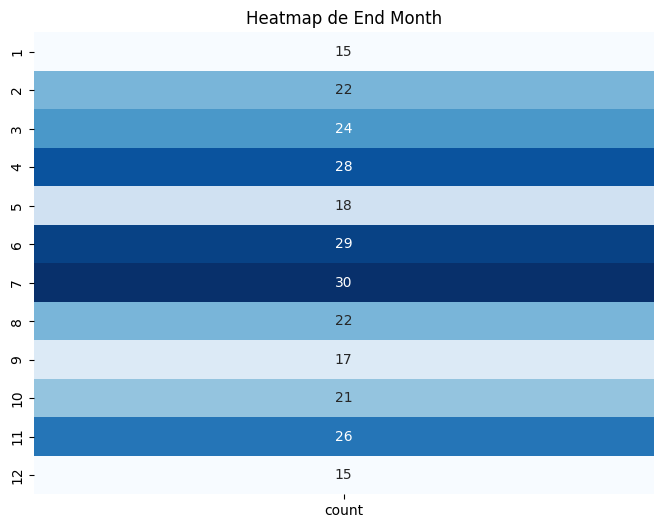

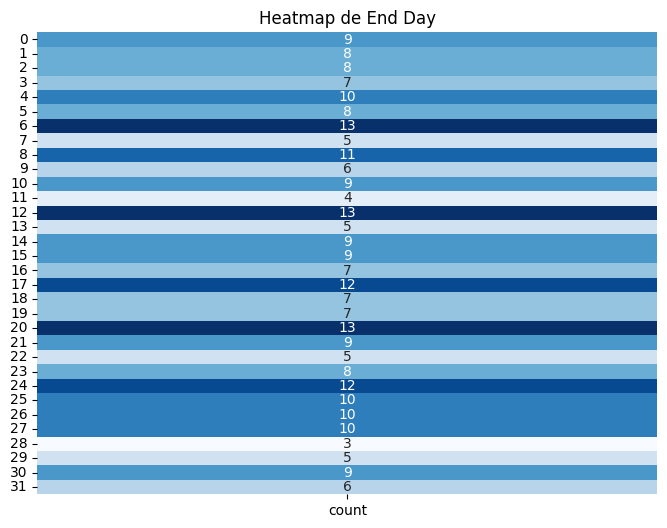

In [48]:
for column in df_flood_corr_temp:
    crosstab = pd.crosstab(df_flood_corr_temp[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# Diagrama Sankey para Flujo de Subtipos de Inundaciones

In [49]:
import plotly.graph_objects as go

# Agrupar por columnas relevantes y calcular los conteos
df_sankey = df_flood_cleaned.groupby(['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region']).size().reset_index(name='Count')

# Crear las etiquetas de nodos para el diagrama Sankey
nodes = pd.unique(df_sankey[['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region']].values.ravel('K'))

# Crear enlaces entre nodos
link_source = [nodes.tolist().index(x) for x in df_sankey['Disaster Type']]
link_target = [nodes.tolist().index(x) for x in df_sankey['Disaster Subtype']]
link_value = df_sankey['Count']

# Crear el diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
    )
)])

# Personalizar el diagrama Sankey
fig.update_layout(
    title='Diagrama Sankey de Flujo de Subtipo de Inundaciones',
    font=dict(size=10),
    height=600,
    width=800
)

# Show the Sankey diagram
fig.show()


## Análisis de Impacto y Relación de la Magnitud de Inundaciones

### Distribución de Valores de Magnitud por Origen

In [50]:
df_flood_cleaned['Associated Dis'].unique()

array(['Slide (land, mud, snow, rock)', 'Broken Dam/Burst bank', 'Rain',
       'Tsunami/Tidal wave', 'Lightening', 'Transport accident', 'Hail',
       'Storm', 'Crop failure', 'Collapse'], dtype=object)

### Distribución de Valores de Magnitud por Desastre Asociado

### Relación entre la Magnitud y Variaciones de Inundaciones

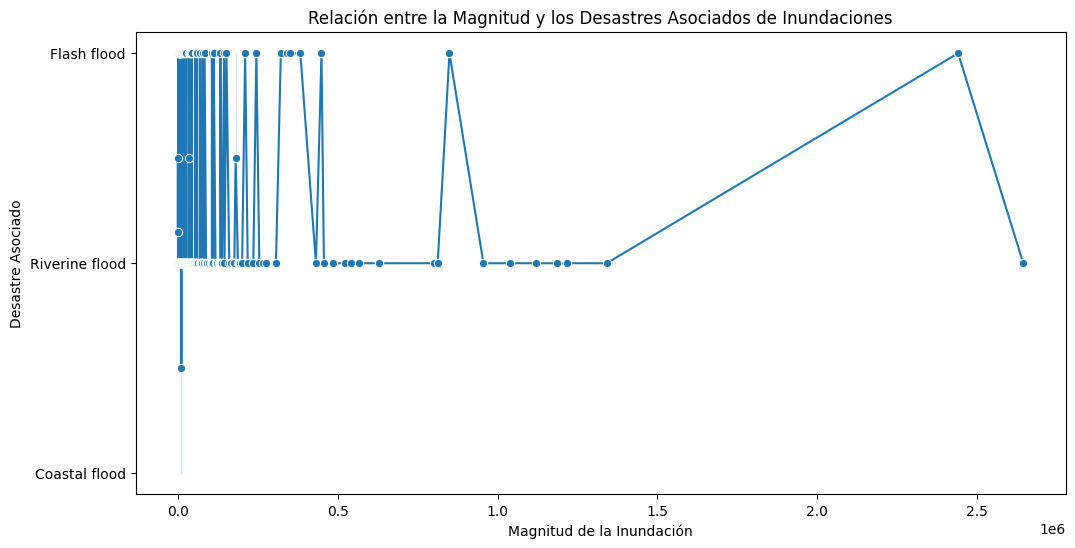

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_flood_cleaned, x="Dis Mag Value", y="Disaster Subtype", marker="o")
plt.title("Relación entre la Magnitud y los Desastres Asociados de Inundaciones")
plt.xlabel("Magnitud de la Inundación")
plt.ylabel("Desastre Asociado")
plt.show()

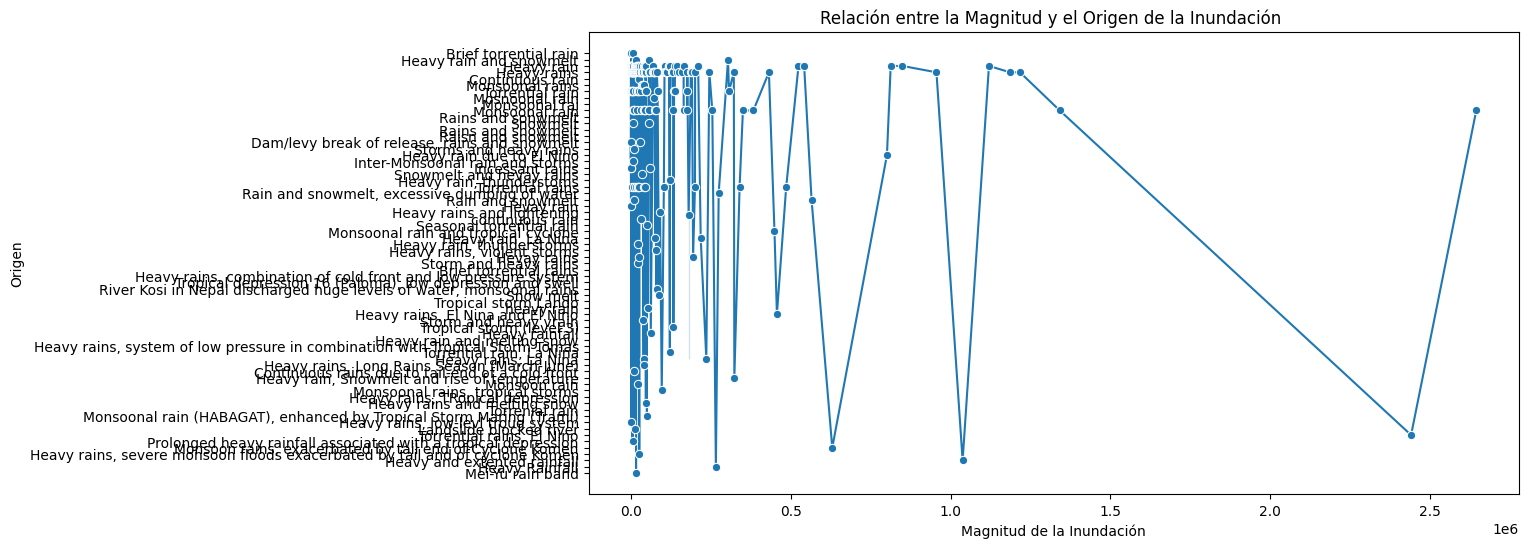

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_flood_cleaned, x="Dis Mag Value", y="Origin", marker="o")
plt.title("Relación entre la Magnitud y el Origen de la Inundación ")
plt.xlabel("Magnitud de la Inundación")
plt.ylabel("Origen")
plt.show()

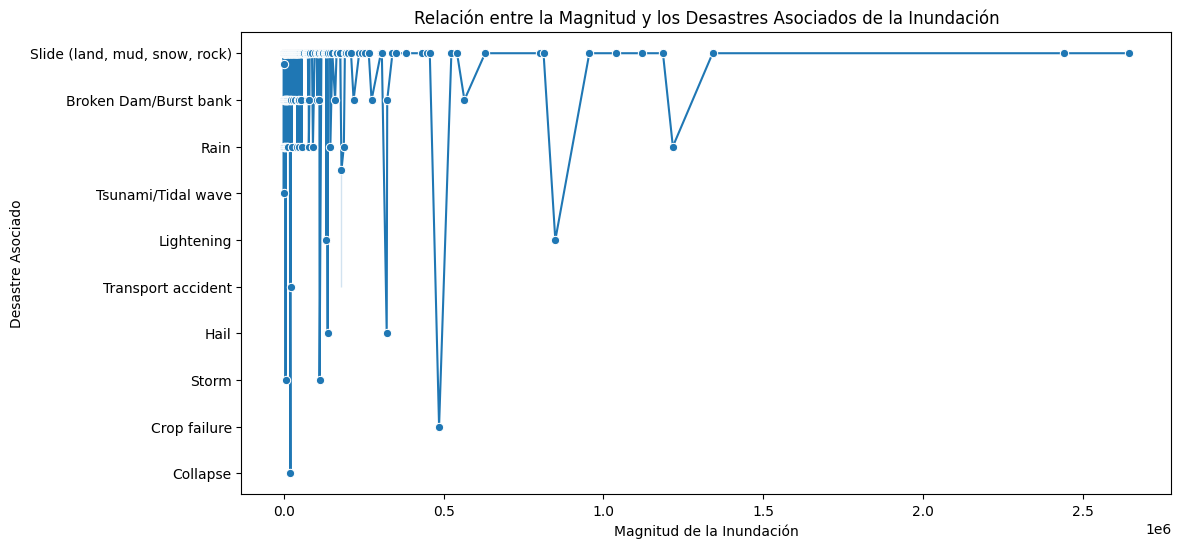

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_flood_cleaned, x="Dis Mag Value", y="Associated Dis", marker="o")
plt.title("Relación entre la Magnitud y los Desastres Asociados de la Inundación")
plt.xlabel("Magnitud de la Inundación")
plt.ylabel("Desastre Asociado")
plt.show()

# Tipo de Inundación (Flood Type) considerando estadísticas de magnitud Dis Mag Value, Total Deaths, Total Affected y Total Damages Adj

In [54]:
min_dis_mag = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].min()
max_dis_mag = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].max()
std_dis_mag = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].std()
mean_dis_mag = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].mean()
median_dis_mag = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].median()

min_tot_deaths = df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].min()
max_tot_deaths = df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].max()
std_tot_deaths = df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].std()
mean_tot_deaths = df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].mean()
median_tot_deaths = df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].median()

min_tot_affect = df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].min()
max_tot_affect = df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].max()
std_tot_affect = df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].std()
mean_tot_affect = df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].mean()
median_tot_affect = df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].median()

min_tot_damages = df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].min()
max_tot_damages = df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].max()
std_tot_damages = df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].std()
mean_tot_damages = df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].mean()
median_tot_damages = df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].median()

In [55]:
print(df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].min())
print(df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].max())
print(df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].std())
print(df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].mean())
print(df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].median())

print(df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].min())
print(df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].max())
print(df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].std())
print(df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].mean())
print(df_flood_cleaned['Total Deaths'].loc[df_flood_cleaned['Total Deaths'].gt(0)].median())

print(df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].min())
print(df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].max())
print(df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].std())
print(df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].mean())
print(df_flood_cleaned['Total Affected'].loc[df_flood_cleaned['Total Affected'].gt(0)].median())

print(df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].min())
print(df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].max())
print(df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].std())
print(df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].mean())
print(df_flood_cleaned['Total Damages Adj'].loc[df_flood_cleaned['Total Damages Adj'].gt(0)].median())

290
2643786
313138.32911609724
138528.68669527897
39793.0
1
6054
406.1257608079182
85.66255144032922
24.0
8
67900000
5273471.018213425
984538.108
20202.0
71
52041595
4609896.729977168
879407.6691729323
87304.0


In [56]:
type1_threshold = min_dis_mag + std_dis_mag
type2_threshold = min_dis_mag + (2 * std_dis_mag)
type3_threshold = max_dis_mag - std_dis_mag

In [57]:
def assign_flood_type(row):
    if row['Dis Mag Value'] < 24681.0 and row['Total Deaths'] < 100 and row['Total Affected'] < 10000 and row['Total Damages Adj'] < 1000000:
        return 'Type 1 - Low'
    elif row['Dis Mag Value'] < 92063.0765334834 and row['Total Deaths'] < 500 and row['Total Affected'] < 100000 and row['Total Damages Adj'] < 10000000:
        return 'Type 2 - Moderate'
    elif row['Dis Mag Value'] < 206861.50686270732 and row['Total Deaths'] < 1000 and row['Total Affected'] < 500000 and row['Total Damages Adj'] < 100000000:
        return 'Type 3 - High'
    else:
        return 'Type 4 - Very High'

In [58]:
df_flood_cleaned['Flood Type'] = df_flood_cleaned.apply(assign_flood_type, axis=1)
df_flood_cleaned['Flood Type']

0            Type 1 - Low
1      Type 4 - Very High
2      Type 4 - Very High
3       Type 2 - Moderate
4            Type 1 - Low
              ...        
262         Type 3 - High
263         Type 3 - High
264     Type 2 - Moderate
265     Type 2 - Moderate
266         Type 3 - High
Name: Flood Type, Length: 267, dtype: object

In [59]:
min_value = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].min()
min_value

290

In [60]:
max_value = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].max()
max_value

2643786

In [61]:
std_value = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].std()
std_value

313138.32911609724

In [62]:
median_value = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].median()
median_value

39793.0

In [63]:
mean_value = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].mean()
mean_value

138528.68669527897

In [64]:
valuecounts = df_flood_cleaned['Dis Mag Value'].loc[df_flood_cleaned['Dis Mag Value'].gt(0)].value_counts()
print(valuecounts)

290        2
34760      2
180760     2
11140      2
4600       2
          ..
1120000    1
103400     1
75830      1
350600     1
112272     1
Name: Dis Mag Value, Length: 228, dtype: int64


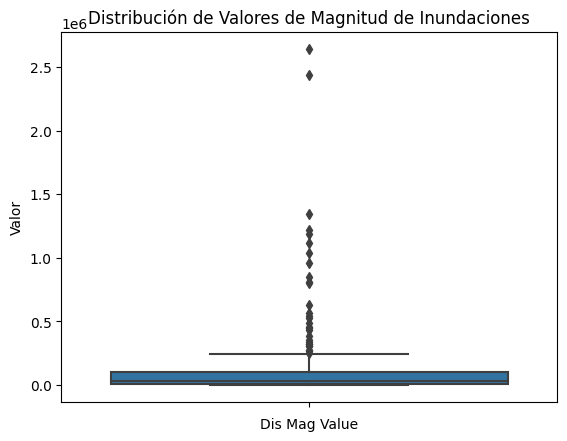

In [65]:
sns.boxplot(data=df_flood_cleaned, y='Dis Mag Value')
plt.xlabel('Dis Mag Value')
plt.ylabel('Valor')
plt.title('Distribución de Valores de Magnitud de Inundaciones')
plt.show()

In [66]:
flood_type_counts = df_flood_cleaned['Flood Type'].value_counts()
print(flood_type_counts)

Type 2 - Moderate     92
Type 4 - Very High    65
Type 1 - Low          57
Type 3 - High         53
Name: Flood Type, dtype: int64


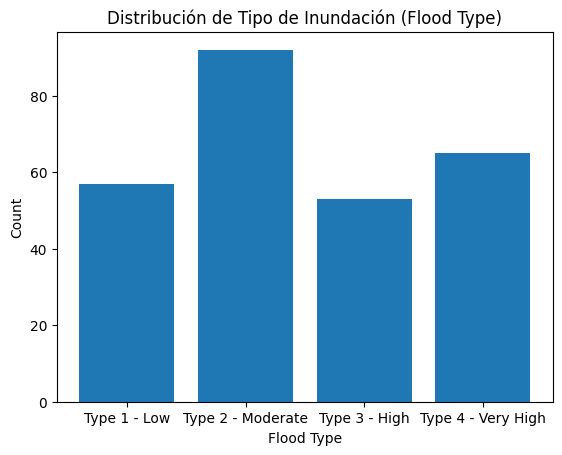

In [67]:
flood_type_counts_sorted = flood_type_counts.loc[['Type 1 - Low', 'Type 2 - Moderate', 'Type 3 - High', 'Type 4 - Very High']]

plt.bar(flood_type_counts_sorted.index, flood_type_counts_sorted.values)
plt.xlabel('Flood Type')
plt.ylabel('Count')
plt.title('Distribución de Tipo de Inundación (Flood Type)')
plt.show()

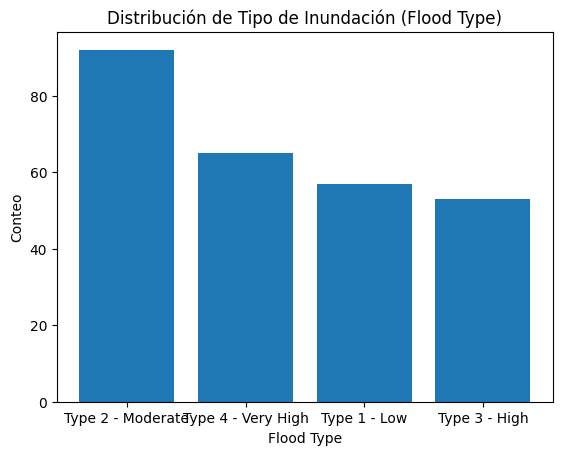

In [68]:
plt.bar(flood_type_counts.index, flood_type_counts.values)
plt.xlabel('Flood Type')
plt.ylabel('Conteo')
plt.title('Distribución de Tipo de Inundación (Flood Type)')
plt.show()

# Conclusiones

# Recomendaciones

# Guardar dataset en csv

In [69]:
# df.to_csv('../../Data/03Limpio/FloodLimpioCSV/03FloodLimpio_ColFloodType.csv')

Dataset con filtro flood, valores rellenados, filas de valores nulos borrados y columna Flood Type creada y asignada con estadística.